In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import arviz as az
import graphviz

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

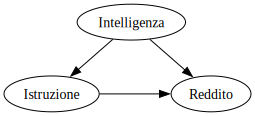

In [3]:
f = graphviz.Digraph()
f.attr(ranksep="0.5")  # Aumenta la separazione tra i livelli
f.attr(nodesep="1.0")  # Aumenta la separazione tra i nodi sullo stesso livello

# Crea un subgraph con lo stesso rank
with f.subgraph() as s:
    s.attr(rank="same")
    # Aggiungi i nodi al subgraph
    s.node("Istruzione")
    s.node("Reddito")

# Definisci le relazioni tra i nodi
f.edge("Intelligenza", "Istruzione")
f.edge("Intelligenza", "Reddito")
f.edge("Istruzione", "Reddito")

# Visualizza il DAG
f

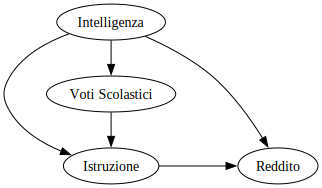

In [4]:
f = graphviz.Digraph()
f.attr(ranksep="0.5")  # Aumenta la separazione tra i livelli
f.attr(nodesep="1.0")  # Aumenta la separazione tra i nodi sullo stesso livello

# Crea un subgraph con lo stesso rank
with f.subgraph() as s:
    s.attr(rank="same")
    # Aggiungi i nodi "Istruzione" e "Reddito" al subgraph
    s.node("Istruzione")
    s.node("Reddito")

# Aggiungi il nodo "Voti Scolastici"
f.node("Voti Scolastici")

# Definisci le relazioni tra i nodi
f.edge("Intelligenza", "Istruzione")
f.edge("Intelligenza", "Reddito")
f.edge(
    "Intelligenza", "Voti Scolastici"
)  # Aggiungi relazione tra Intelligenza e Voti Scolastici
f.edge(
    "Voti Scolastici", "Istruzione"
)  # Aggiungi relazione tra Voti Scolastici e Istruzione
f.edge("Istruzione", "Reddito")

f

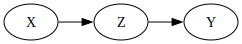

In [5]:
f = graphviz.Digraph()
f.edge("X", "Z")
f.edge("Z", "Y")
f.attr(rankdir='LR')
f

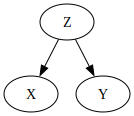

In [6]:
f = graphviz.Digraph()
f.edge("Z", "X")
f.edge("Z", "Y")
f

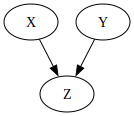

In [7]:
f = graphviz.Digraph()
f.edge("X", "Z")
f.edge("Y", "Z")
f

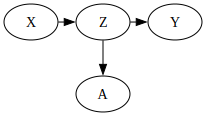

In [8]:
f = graphviz.Digraph()

with f.subgraph() as s:
    s.attr(rank='same')  # Assicura che X, Z, e Y siano sullo stesso livello
    s.edge("X", "Z")
    s.edge("Z", "Y")

f.edge("Z", "A")  

f

In [9]:
c = np.random.rand(100)

In [10]:
x = c + 0.1 * np.random.rand(100)
y = c + 0.3 * np.random.rand(100)

In [11]:
coef, p_val = stats.pearsonr(x, y)
print(coef)

0.955222796435933


/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_32871/259294172.py:22: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.3)


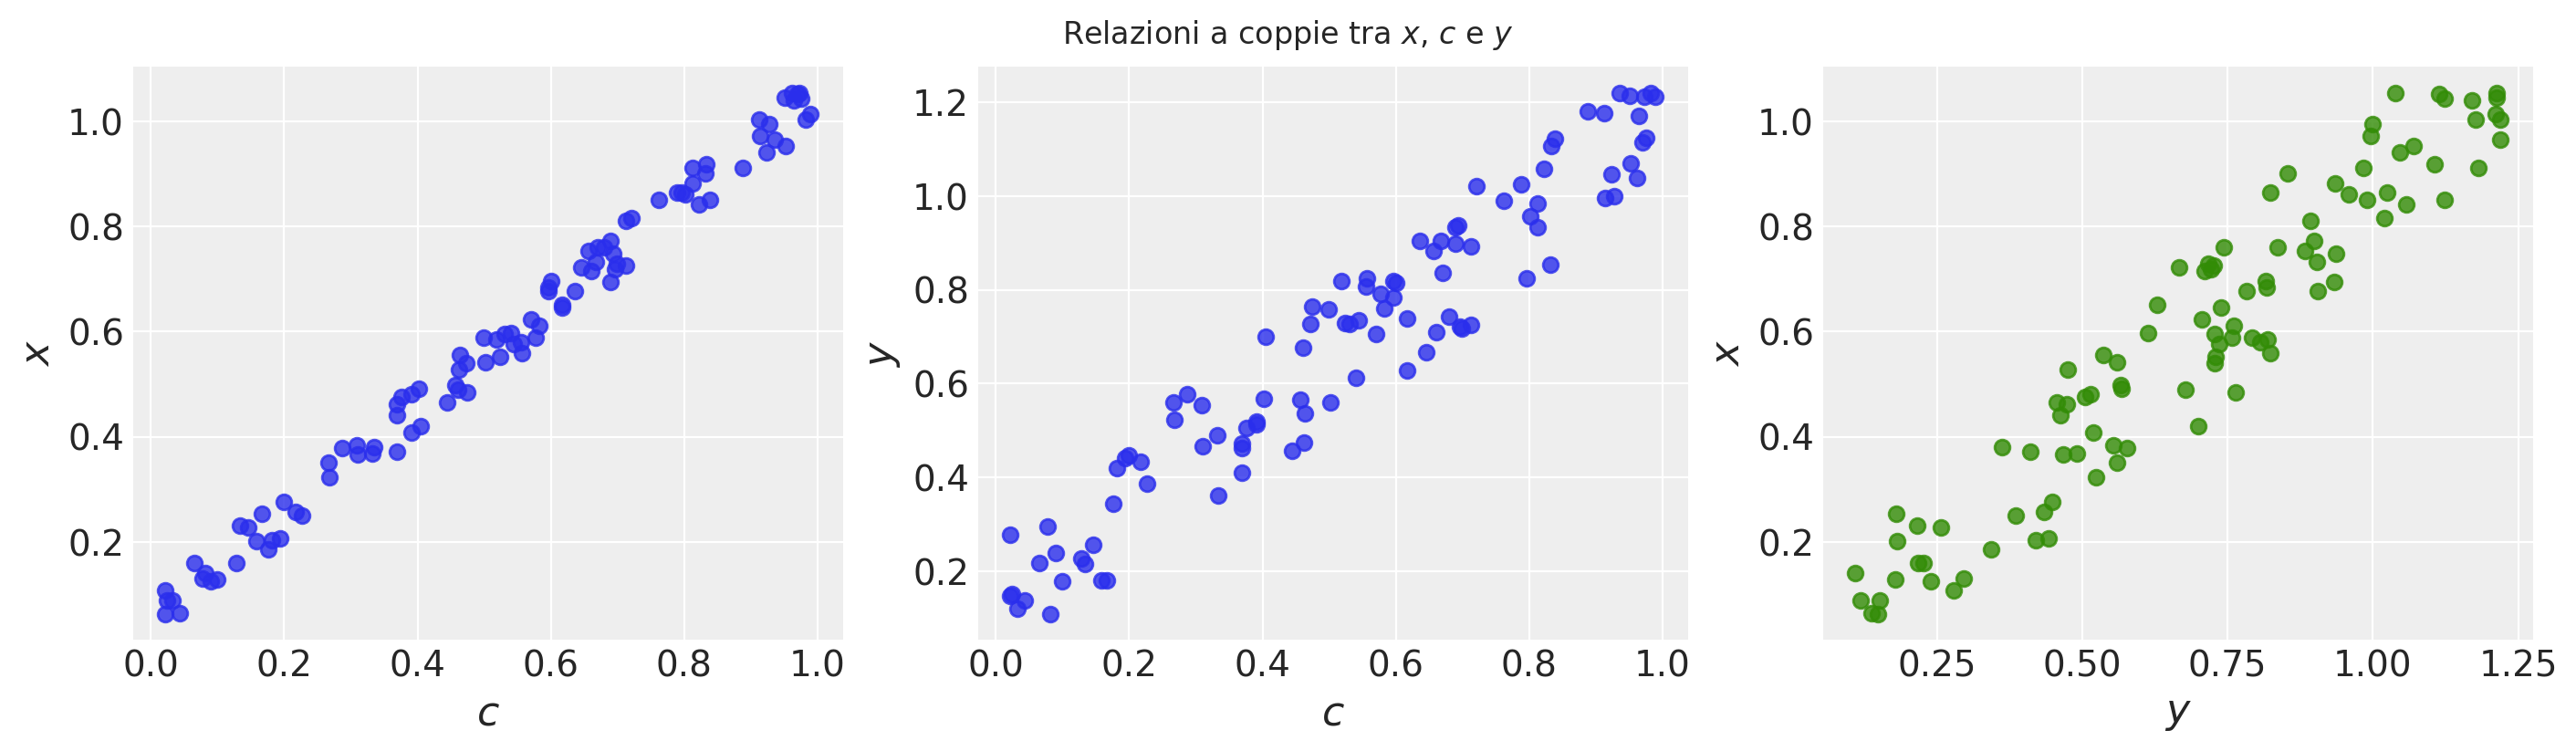

In [12]:
# Il codice è tratto da A. Molak (2023) "Causal Inference and Discovery in Python".

COLORS = ["C0", "C2"]

variables = {"x": x, "c": c, "y": y}

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for i, (var_1, var_2) in enumerate([("c", "x"), ("c", "y"), ("y", "x")]):
    color = COLORS[1]

    if "c" in [var_1, var_2]:
        color = COLORS[0]

    ax = axes[i]
    ax.scatter(variables[var_1], variables[var_2], alpha=0.8, color=color)

    ax.set_xlabel(f"${var_1}$", fontsize=16)
    ax.set_ylabel(f"${var_2}$", fontsize=16)

plt.suptitle("Relazioni a coppie tra $x$, $c$ e $y$")
plt.subplots_adjust(wspace=0.3)
plt.show()

In [13]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Sun Jun 16 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.25.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

seaborn   : 0.13.2
numpy     : 1.26.4
pandas    : 2.2.2
scipy     : 1.13.1
graphviz  : 0.20.3
matplotlib: 3.8.4
arviz     : 0.18.0

Watermark: 2.4.3

